<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/Transaction_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification to Predict Transaction Success


This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

## Problem Definition


A company wants to predict whether a future customer will make a transaction based on their transaction data.

This is a supervised learning problem because we have labeled historical data indicating whether a customer made a transaction. It is specifically a binary classification problem, where the target variable has two possible values:

1 (Yes): The customer made a transaction.

0 (No): The customer did not make a transaction.

The goal is to train a Gaussian Naive Bayes classifier to predict the probability of a future customer making a transaction based on anonymized transaction data.

## Data Collection/Sources


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets, metrics, model_selection
from sklearn.utils import resample

In [ ]:
trans_data=pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv')

In [ ]:
trans_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
trans_data.shape

(180000, 53)

## Data Cleaning


In [ ]:
trans_data.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
#Check if there is any null value
trans_data.isnull().sum().sum()

0

This means there is no nulls values in any of the columns

In [ ]:
trans_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,89999.500000,51961.668564,0.0000,44999.750000,89999.50000,134999.250000,179999.0000
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480


Let's Drop unnecessary columns ('ID_code' is just an identifier) and unnamed:0 is a redundant column

In [ ]:
#Creating a backup
trans_copy=trans_data.copy()

In [ ]:
# Drop unnecessary columns
trans_data.drop(columns=['ID_code'],inplace=True)
trans_data.drop(columns=['Unnamed: 0'],inplace=True)
trans_data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


## Exploratory Data Analysis


In [ ]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

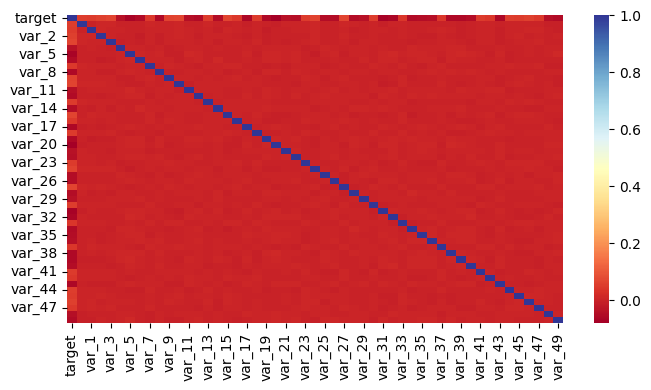

In [ ]:
corr=trans_data.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False);

This suggests that the features are weakly correlated with each other, which aligns well with the Naïve Bayes assumption of feature independence

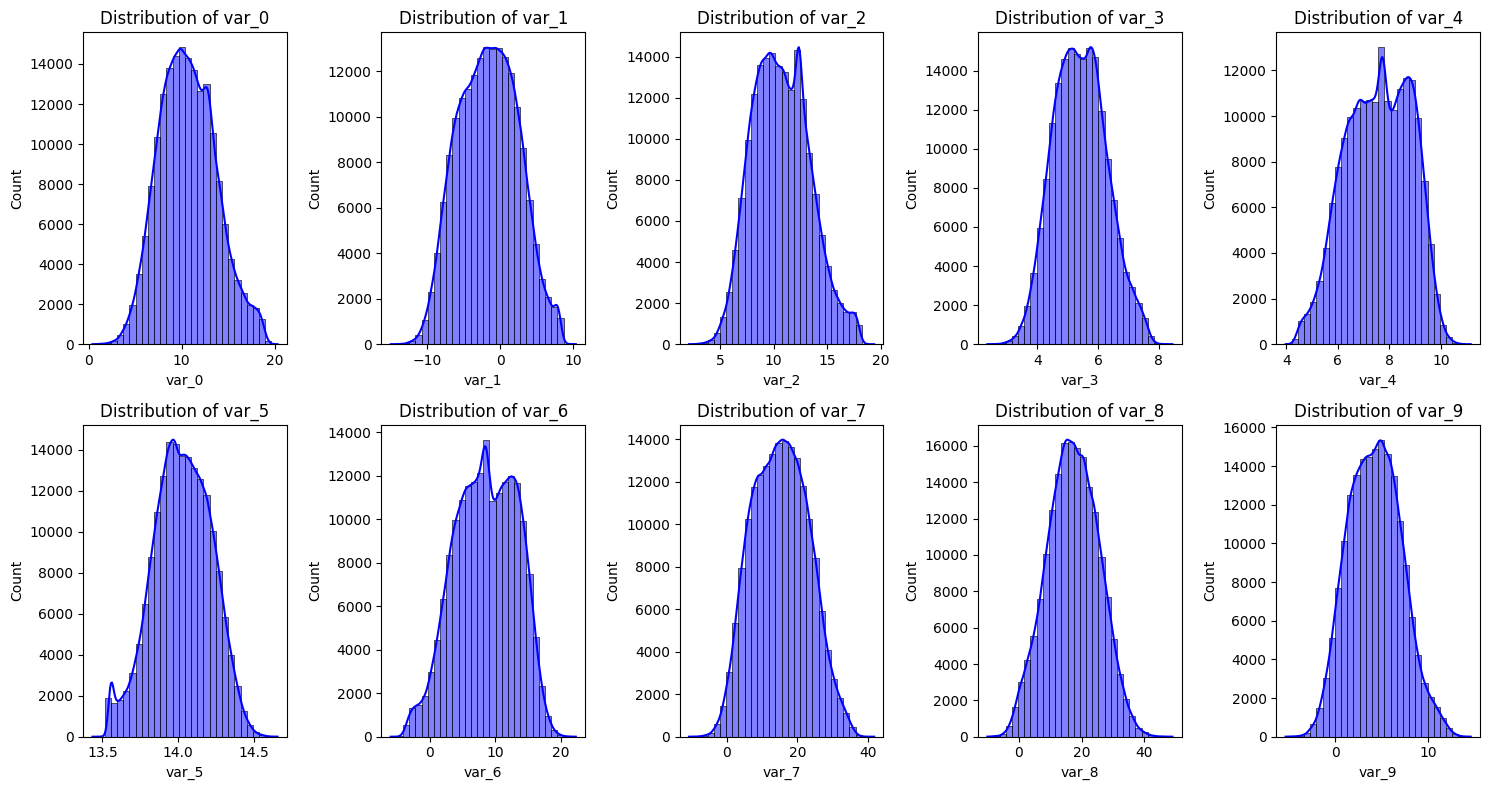

In [ ]:
num_features = trans_data.columns[1:11]  # Selecting first 10 numerical features for plotting

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 5, i)
    sns.histplot(trans_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

From the above graph,it is clear that the variables are normally distributed

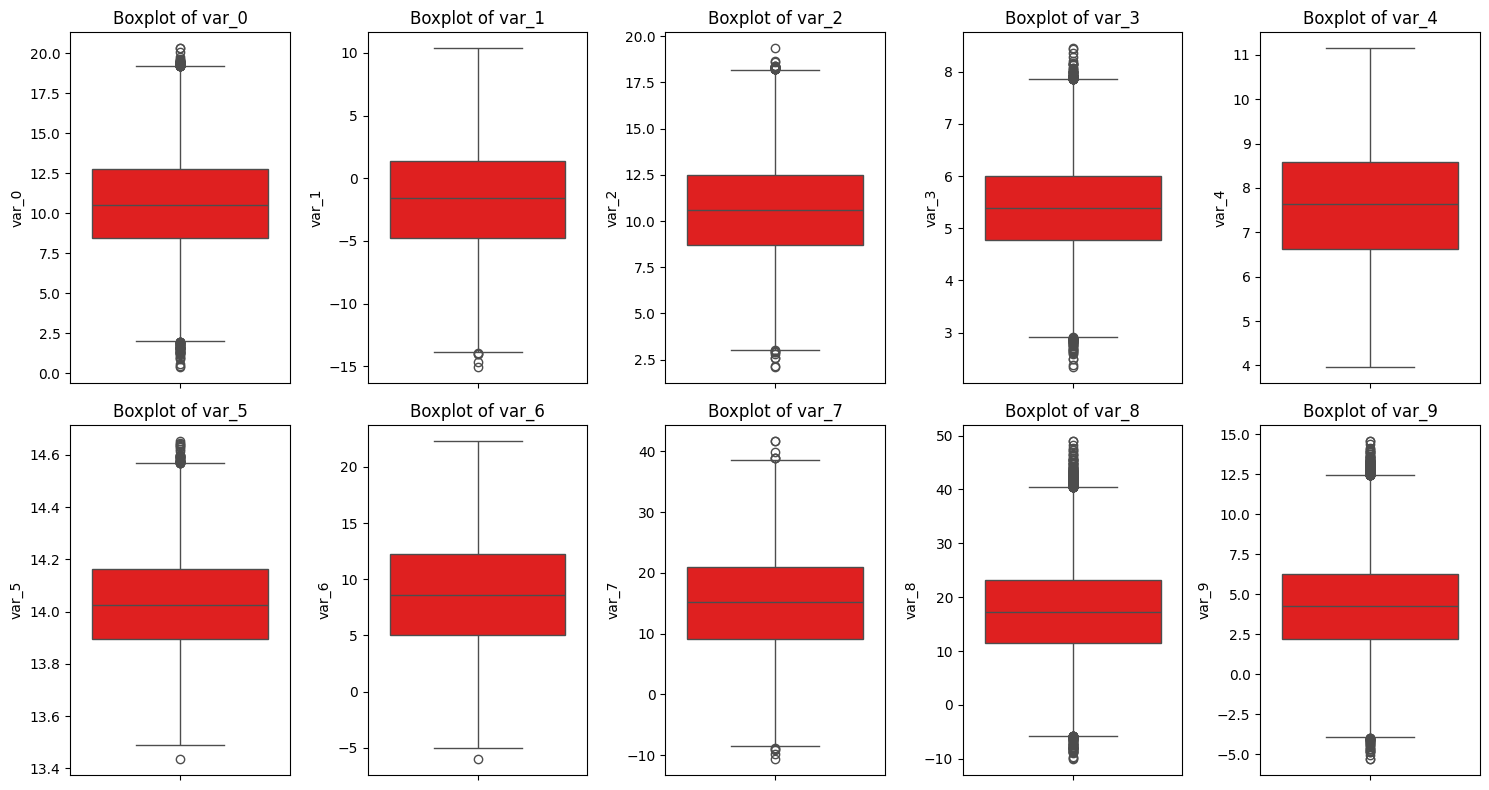

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=trans_data[col], color='red')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

No potential outliers are detected from the above graph

The ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

In [ ]:
trans_data['target'].value_counts(dropna = False)

,count
target,
0,161960
1,18040


It is clear that the target column contains only valid values(0 or 1)

In [ ]:
trans_data['target'].value_counts(normalize=True)*100

,proportion
target,
0,89.977778
1,10.022222


This means that 90% of the data belongs to class 0(no transaction) and 10% belongs to class 1(transaction)

###Checking correlation values between all predictor columns

Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes

In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self


target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [ ]:
# Because negative correlation could also be of interest, we will take the absolute value, `abs()`.
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)

,0
var_20,0.080689
var_31,0.073296
var_5,0.070015
var_3,0.066924
var_27,0.064868
var_32,0.063871
var_10,0.063565
var_15,0.062887
var_43,0.061291
var_17,0.059906


In [ ]:
#Next, let's look at which pairs of features are most correlated.
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

target  var_20    0.080689
var_20  target    0.080689
var_31  target    0.073296
target  var_31    0.073296
        var_5     0.070015
                    ...   
var_43  var_18    0.000019
var_39  var_41    0.000018
var_41  var_39    0.000018
var_45  var_48    0.000009
var_48  var_45    0.000009
Length: 2550, dtype: float64

In [ ]:
corr_pair[::2].head(20)

target  var_20    0.080689
var_31  target    0.073296
target  var_5     0.070015
var_3   target    0.066924
var_27  target    0.064868
var_32  target    0.063871
target  var_10    0.063565
var_15  target    0.062887
target  var_43    0.061291
        var_17    0.059906
var_24  target    0.059306
target  var_9     0.059227
        var_8     0.057378
var_39  target    0.057373
var_19  target    0.057320
target  var_46    0.056902
var_38  target    0.055704
var_2   target    0.055450
target  var_6     0.054375
var_34  target    0.053733
dtype: float64

In [ ]:
# An alternative method for finding the most highly correlated features
corr = trans_data.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868


###Splitting - successful and unsuccesful transactions

Now it is clear that there are no substantial correlations between predictors

Create two data frames: one with all successful transactions, one with all unsuccessful transactions

In [ ]:
#Create two data frames:
df_success = trans_data[trans_data['target'] == 1].copy()   # All successful transactions
df_failure = trans_data[trans_data['target'] == 0].copy()   #All unsuccessful transactions

In [ ]:
# Display counts for verification
print(f"Successful Transactions: {df_success.shape[0]}")
print(f"Unsuccessful Transactions: {df_failure.shape[0]}")

Successful Transactions: 18040
Unsuccessful Transactions: 161960


## Processing


In [ ]:
# Creating a copy of the predictor columns (excluding 'Unnamed: 0', 'ID_code', and 'target')
X = trans_data.drop(columns=['target']).copy()

# Creating a copy of the target column
y = trans_data['target'].copy()

# Display shapes for verification
print(f"Predictor DataFrame Shape: {X.shape}")
print(f"Target DataFrame Shape: {y.shape}")

Predictor DataFrame Shape: (180000, 50)
Target DataFrame Shape: (180000,)


### Gaussian Naive Bayes Model


In [ ]:
gnb = GaussianNB()

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#Train the model using the training subset of the dataset
gnb.fit(X_train, y_train)
#Test the model using the testing subset of the dataset
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"


Number of mislabeled points out of a total 36000 points : 3283


###Classification Report

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Model Accuracy on Test Data: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy on Test Data: 0.9088

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.22      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



###Cross Validation

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91126


We are seeing about 91% accuracy

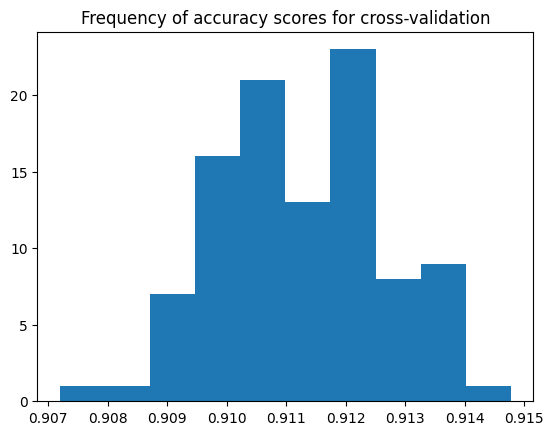

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

We can see that we have a decent average accuracy.However some folds may perform significantly better/worse than others, indicating potential dataset bias

###Confusion Matrix

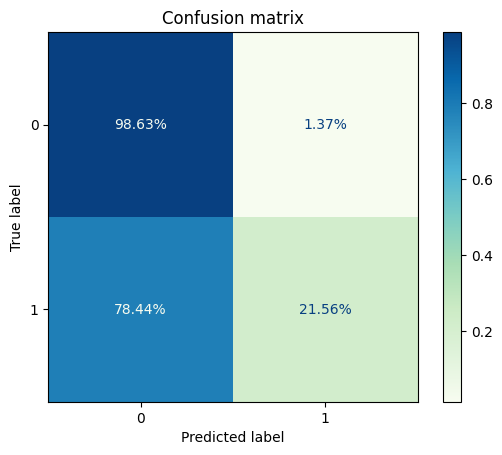

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

This indicates that there is significant false negatives and there is some issue with the prediction

The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions

###Create balanced dataset by downsampling non-successful transactions

In [ ]:
# Downsample non-successful transactions to match the successful transactions count
df_failure_downsampled = resample(df_failure,
                                  replace=False,  # Do not duplicate
                                  n_samples=len(df_success),  # Match count of successful transactions
                                  random_state=42)  # Ensure reproducibility

# Combine balanced data
df_balanced = pd.concat([df_success, df_failure_downsampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify new class distribution
print(df_balanced['target'].value_counts())


target
1    18040
0    18040
Name: count, dtype: int64


In [ ]:
df_balanced.shape

(36080, 51)

###Cross Validation-balanced data

In [ ]:
X = df_balanced.drop(columns=['target'])  # Drop the target column
y = df_balanced['target']  # Target column
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.75881


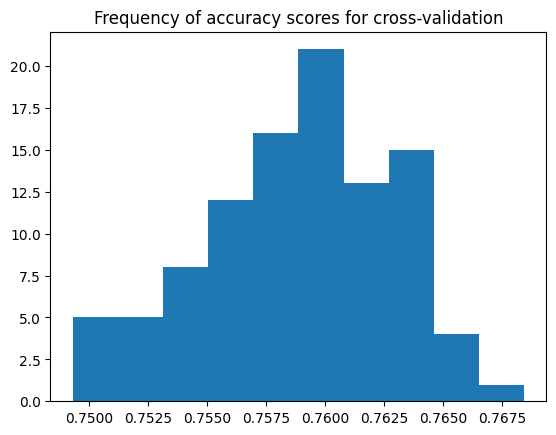

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

## Data Visualization/Communication of Results

###Classification Report-balanced data

In [ ]:
X_balanced = df_balanced.drop(columns=["target"]).copy()
y_balanced = df_balanced["target"].copy()
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train Naïve Bayes on the balanced dataset
nb_model_bal = GaussianNB()
nb_model_bal.fit(X_train_bal, y_train_bal)
y_pred_balanced = nb_model_bal.predict(X_test_bal)

# Print classification report for balanced dataset
print("Classification Report (Balanced 50/50 Data):")
print(classification_report(y_test_bal, y_pred_balanced))


# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}""
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_bal.shape[0], (y_test_bal != y_pred_balanced).sum()))


Classification Report (Balanced 50/50 Data):
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3606
           1       0.75      0.73      0.74      3610

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216

Number of mislabeled points out of a total 7216 points : 1824


###Confusion matrix-balanced data

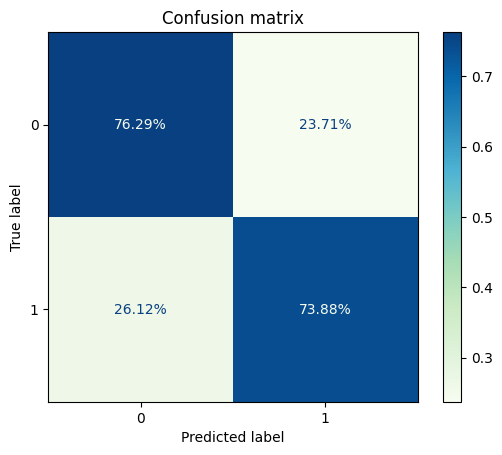

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test_bal,
    y_test_bal,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

##Conclusion



*   The original imbalanced dataset might have shown higher accuracy because the model was biased towards predicting the majority class (target = 0)
*   The balanced dataset typically leads to lower accuracy but provides a fairer evaluation of model performance.
*  The original dataset had high accuracy but poor recall for target = 1, it suggests that the model failed to detect successful transactions.
*   The balanced dataset forces the model to learn both classes equally, improving its ability to predict target = 1




.
